In [111]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works. 

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv

In [112]:
# load dataset and show the first five sample
url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv'
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [113]:
# describe data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

For this case study, we only use income and spending score 

In [114]:
# create new dataframe that consist only annual income and spending score
new_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(new_df.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


Before we analyze our data, we need to scale the data with standardization method

In [115]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(scaled_df, columns=['Scaled Annual Income', 'Scaled Spending Score'])
print(scaled_df.head())

   Scaled Annual Income  Scaled Spending Score
0             -1.738999              -0.434801
1             -1.738999               1.195704
2             -1.700830              -1.715913
3             -1.700830               1.040418
4             -1.662660              -0.395980


In [116]:
# get stastical information on the new dataset
stats = scaled_df.describe()
print(stats)


       Scaled Annual Income  Scaled Spending Score
count          2.000000e+02           2.000000e+02
mean          -6.128431e-16          -1.121325e-16
std            1.002509e+00           1.002509e+00
min           -1.738999e+00          -1.910021e+00
25%           -7.275093e-01          -5.997931e-01
50%            3.587926e-02          -7.764312e-03
75%            6.656748e-01           8.851316e-01
max            2.917671e+00           1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

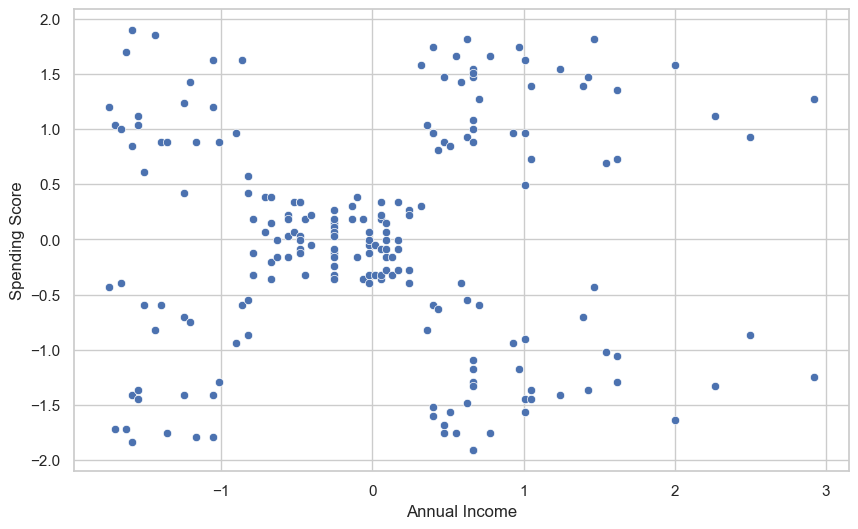

In [117]:
# Visualize the position 
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Scaled Annual Income', y='Scaled Spending Score', data=scaled_df)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()



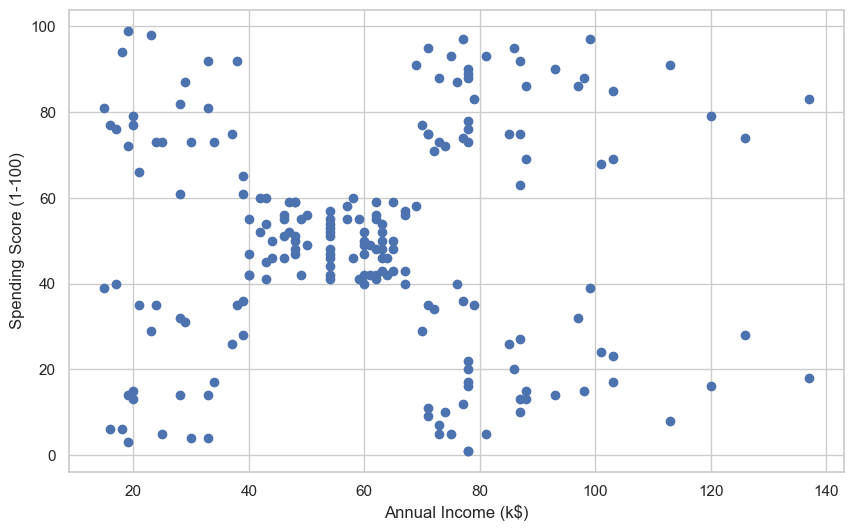

In [118]:
# Visualize the position using the original scale
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


## Clustering

### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [119]:
import pandas as pd
from sklearn.cluster import KMeans
scaled_df.dropna(subset=['Scaled Annual Income', 'Scaled Spending Score'], inplace=True)

# Set the parameters for KMeans
num_clusters = 5
init_method = 'random'
max_iter = 300
random_state = 42
n_init = 10  # Set n_init to 10 (default)

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, init=init_method, max_iter=max_iter, random_state=random_state, n_init=n_init)

# Fit the KMeans model to the relevant columns
kmeans.fit(scaled_df[['Scaled Annual Income', 'Scaled Spending Score']])


KMeans(init='random', n_clusters=5, random_state=42)

Visualize your result based on income and spending. You also can show the final position of the centroid.

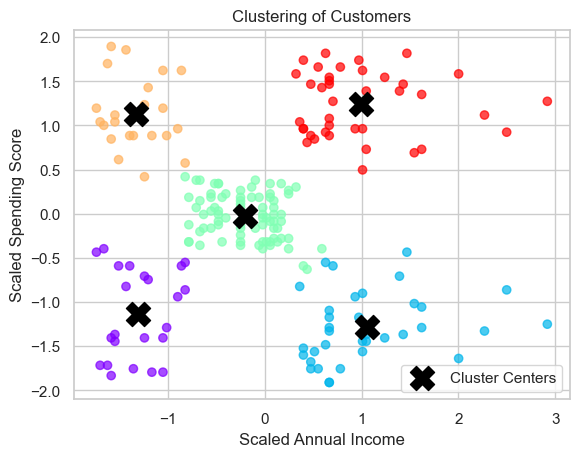

In [120]:
# visualize the result using scater chart
import matplotlib.pyplot as plt

# Scatter plot with clustered points
plt.scatter(scaled_df['Scaled Annual Income'], scaled_df['Scaled Spending Score'], c=kmeans.labels_, cmap='rainbow', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Cluster Centers')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('Clustering of Customers')
plt.legend()
plt.show()


The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method and silhouette score

1. using elbow method

In [121]:
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Initialize a list to store the inertia (within-cluster sum of squares)
inertia = []

# Set a range of possible cluster numbers (K)
possible_clusters = range(1, 11)  # We'll consider up to 10 clusters

# Calculate inertia for each K
for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(scaled_df[['Scaled Annual Income', 'Scaled Spending Score']])
    inertia.append(kmeans.inertia_)

c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


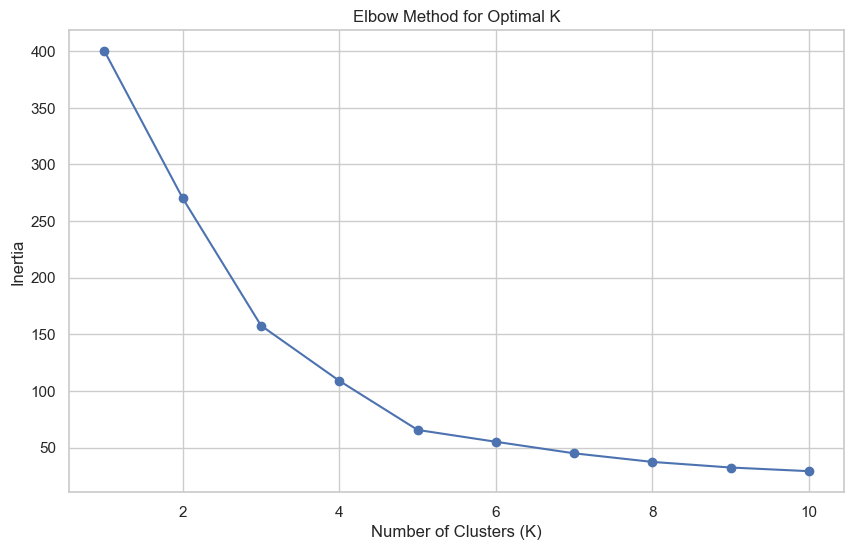

In [126]:
# manually visualize the elbow method using plotlib
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)

In [125]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kneelocate = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
print("the best k for your model is", kneelocate.knee)

the best k for your model is 5
